# Breast - Cancer Stacking

## Data Loading

In [58]:
#importing libraries
import numpy as np 
import pandas as pd 
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

In [59]:
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = pd.Series(cancer.target)


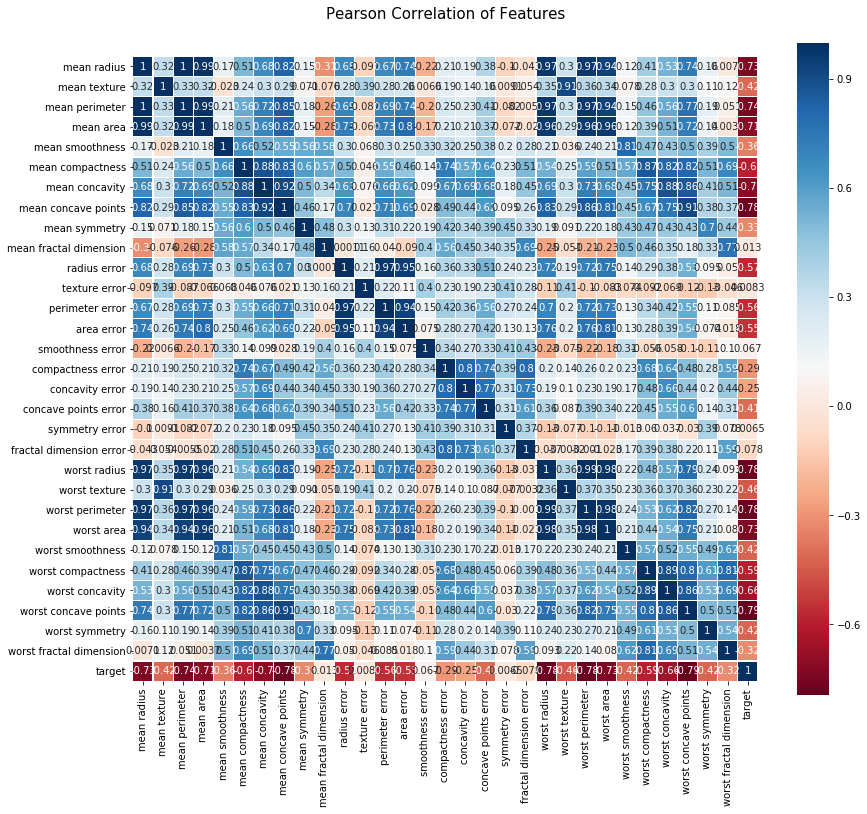

In [60]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cancer_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [61]:
# Create correlation matrix
corr_matrix = cancer_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'perimeter error',
 'area error',
 'concavity error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst fractal dimension']

In [62]:
cancer_df_1= cancer_df.drop(cancer_df[to_drop], axis = 1)

In [63]:
#train test split

X ,y = cancer_df_1.loc[:,cancer_df_1.columns!='target'],cancer_df_1.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state = 42)
                                                                                

### Build First Layer Estimator

In [73]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 9)
random_forest.fit(X_train,y_train)
y_pred_rf_train = random_forest.predict(X_train)
y_pred_rf = random_forest.predict(X_test)
akurasi_rf = metrics.accuracy_score(y_test, y_pred_rf)
akurasi_rf

0.9254385964912281

In [72]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred_knn_train = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)
akurasi_knn = metrics.accuracy_score(y_test, y_pred_knn)
akurasi_knn

0.8947368421052632

In [71]:
#Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb_train = nb.predict(X_train)
y_pred_nb = nb.predict(X_test)
akurasi_nb = metrics.accuracy_score(y_test, y_pred_nb)
akurasi_nb

0.8991228070175439

In [89]:
pred_df = pd.DataFrame({'pred_rf':y_pred_rf_train,'pred_knn':y_pred_knn_train,'pred_nb':y_pred_nb_train})
pred_df_test = pd.DataFrame({'pred_rf':y_pred_rf,'pred_knn':y_pred_knn,'pred_nb':y_pred_nb})
print(pred_df.shape)
print(X_train.shape)
print(pred_df_test.shape)
print(X_test.shape)

(341, 3)
(341, 13)
(228, 3)
(228, 13)


In [93]:
X_train_2nd = pd.concat([X_train,pred_df], axis = 0)
X_test_2nd = pd.concat([X_test,pred_df_test], axis = 0)
print(X_train_2nd.shape)
print(X_test_2nd.shape)

(682, 16)
(456, 16)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Meta-Classifier

In [100]:
meta_cls = LogisticRegression()
knn2.fit(pred_df, y_train)
y_pred_meta= knn2.predict(pred_df_test)
akurasi_meta = metrics.accuracy_score(y_test, y_pred_meta)
print("Akurasi dari Meta-Classifier: ", akurasi_meta)

Akurasi dari Meta-Classifier:  0.9254385964912281


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
